In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Load the dataset
data = pd.read_csv('movie_reviews.csv')

In [5]:
data.head()

,text,label
0,If you havent seen this movie than you need to...,1
1,but Cinderella gets my vote not only for the w...,0
2,This movie is pretty cheesy but I do give it c...,1
3,I have not seen a Van Damme flick for a while ...,1
4,This is a sleeper It defines Nicholas Cage The...,1


In [13]:
# Target distribution
data['label'].value_counts()

0    20049
1    19951
Name: label, dtype: int64

In [27]:
evaluate_data = pd.read_csv('test_data.csv')

In [30]:
evaluate_data.head()

,Id,text
0,0,What can possibly said about this movie other ...
1,1,I dont care how many bad reviews purple rain g...
2,2,Ken Russell directed this weird Not very ero...
3,3,This is a great movie from the lost age of rea...
4,4,I have a problem with the movie snobs who cons...


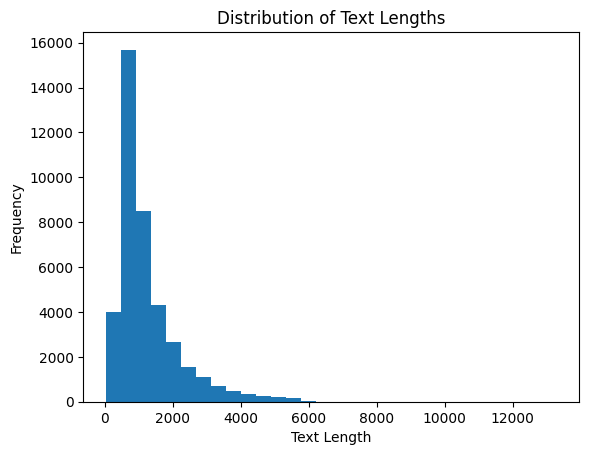

In [16]:
data['text_length'] = data['text'].apply(len)
#Plot the text lengths
plt.hist(data['text_length'], bins=30)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

In [6]:
# Split the dataset into features (X) and target (y)
X = data['text']
y = data['label']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Convert the text data into a matrix of token counts
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [9]:
# Train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

MultinomialNB()

In [10]:
# Predict the labels for the test set
y_pred = clf.predict(X_test_counts)

In [11]:
# Evaluate the performance of the classifier
print('Accuracy:', clf.score(X_test_counts, y_test))

Accuracy: 0.84775


In [29]:
# Now, fit whole set so model can learn on whole set
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(X)

clf = MultinomialNB()
clf.fit(X_counts, y)

MultinomialNB()

In [33]:
counts = vectorizer.transform(evaluate_data['text'])

In [43]:
evaluate_data['Category'] = clf.predict(counts)

In [47]:
evaluate_data.to_csv('sub_Bayes.csv', columns=['Id', 'Category'], index=None)

SUPPORT VECTOR MACHINE


In [19]:
# Convert the text data into a matrix of TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [22]:
# Train the Support Vector Machine classifier
clf = SVC(kernel='linear')
clf.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [23]:
# Predict the labels for the test set
y_pred = clf.predict(X_test_tfidf)

In [24]:
# Evaluate the performance of the classifier
print('Accuracy:', clf.score(X_test_tfidf, y_test))

Accuracy: 0.907875


In [48]:
# Fit whole set
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)
tfidf = vectorizer.transform(evaluate_data['text'])

clf = SVC(kernel='linear')
clf.fit(X_tfidf, y)

SVC(kernel='linear')

In [49]:
evaluate_data['Category'] = clf.predict(tfidf)

In [51]:
evaluate_data.to_csv('sub_SVM.csv', columns=['Id', 'Category'], index=None)